## Packages ##

First, let's run the cell below to import all the packages that you will need. 
- [numpy](www.numpy.org) is the fundamental numerical library for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a fundamental library for plotting and visualizing data using Python.
- [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html) is a sub-package that provides several integration techniques including an ordinary differential equation integrator.
- [scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) integrates a system of ordinary differential equations.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [2]:
def model(state,t,R,L,C):
    '''
    function to calculate derivative
    '''
    dq = state[1]
    di = state[2]
    d2i = - 1 * ( R * state[2] + state[1] / C) / L
    state = [dq, di, d2i]
    return state

### Underdamped Case

In [3]:
# Initial Conditions and constants (in SI units)
R = 2
L = 1
C = 0.1
q_0 = 50
i_0 = 0
di_0 = 100
state_0 = [q_0 , i_0, di_0]

In [4]:
t = np.arange(0, 20, 0.05)

In [5]:
state = odeint(model, state_0, t, args=(R,L,C)) # Solving the System

In [6]:
q = state[:,0]
i = state[:,1]

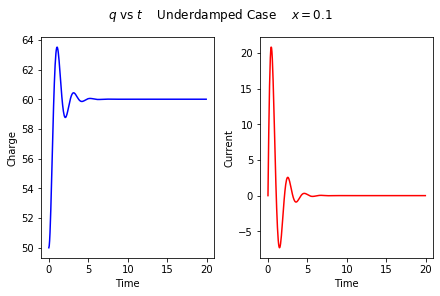

In [7]:
fig, axes = plt.subplots(1,2, constrained_layout=True)
axes[0].plot(t,q,'b-',label=r'Charge')
axes[1].plot(t,i,'r-',label=r'Current')
axes[0].set(xlabel='Time', ylabel='Charge')
axes[1].set(xlabel='Time', ylabel='Current')
fig.suptitle('$q$ vs $t\quad$ Underdamped Case $\quad x=0.1$')
plt.savefig("Underdamped Case.svg")

### Critically Damped Case

In [8]:
# Initial Conditions and constants (in SI units)
R = 2
L = 1
C = 1
q_0 = 50
i_0 = 0
di_0 = 100
state_0 = [q_0 , i_0, di_0]

In [9]:
state = odeint(model, state_0, t, args=(R,L,C)) # Solving the System

In [10]:
q = state[:,0]
i = state[:,1]

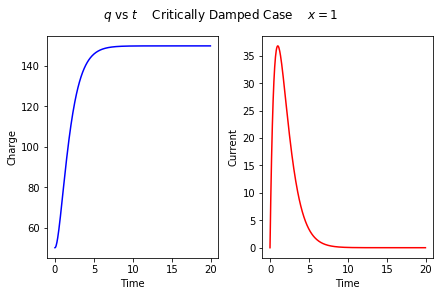

In [11]:
fig, axes = plt.subplots(1,2, constrained_layout=True)
axes[0].plot(t,q,'b-',label=r'Charge')
axes[1].plot(t,i,'r-',label=r'Current')
axes[0].set(xlabel='Time', ylabel='Charge')
axes[1].set(xlabel='Time', ylabel='Current')
fig.suptitle('$q$ vs $t\quad$ Critically Damped Case $\quad x=1$')
plt.savefig("Critically Damped Case.svg")

### Overdamped Case

In [12]:
# Initial Conditions and constants (in SI units)
R = 2
L = 1
C = 10
q_0 = 50
i_0 = 0
di_0 = 100
state_0 = [q_0 , i_0, di_0]

In [13]:
state = odeint(model, state_0, t, args=(R,L,C)) # Solving the System

In [14]:
q = state[:,0]
i = state[:,1]

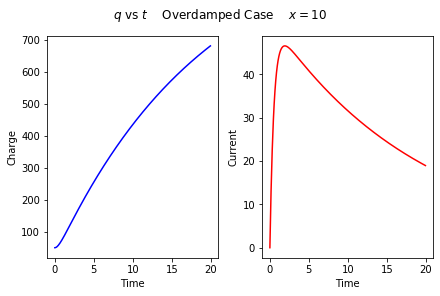

In [15]:
fig, axes = plt.subplots(1,2, constrained_layout=True)
axes[0].plot(t,q,'b-',label=r'Charge')
axes[1].plot(t,i,'r-',label=r'Current')
axes[0].set(xlabel='Time', ylabel='Charge')
axes[1].set(xlabel='Time', ylabel='Current')
fig.suptitle('$q$ vs $t\quad$ Overdamped Case $\quad x=10$')
plt.savefig("Overdamped Case.svg")